https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# <center>Lab 2</center>
# <center>Basics of Data Processing</center>


## Setup

In [236]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required


In [237]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [238]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request


In [239]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/employees/"

In [240]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Darcinn/F21DL/main/"
EMPLOYEES_PATH = os.path.join("datasets", "employees")
EMPLOYEES_URL = DOWNLOAD_ROOT + "datasets/employees/employees.tar.gz"

def fetch_employees_data(employees_url=EMPLOYEES_URL, employees_path=EMPLOYEES_PATH):
    os.makedirs(employees_path, exist_ok=True)
    tgz_path = os.path.join(employees_path, "employees.tar.gz")
    urllib.request.urlretrieve(employees_url, tgz_path)
    employees_tgz = tarfile.open(tgz_path)
    employees_tgz.extractall(path=employees_path)
    employees_tgz.close()

In [241]:
fetch_employees_data()
# calling the function fetch_employees_data, (defined above) creates a datasets/employees directory in your workspace, downloads employees.tgz,
# downloads employees.tgz file and extracts the employees.csv file from it in this directory 

`load_employees_data` function loads the `employees.csv` into a panda `dataframe`

In [242]:
def load_employees_data(employees_path=EMPLOYEES_PATH):
    csv_path = os.path.join(employees_path, "employees.csv")
    return pd.read_csv(csv_path)

In [243]:
employees = load_employees_data() # "employees" is a pandas DataFrame object containing all the data
employees.head() # Display the top five rows of the DataFrame


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<u>Q1 How many attribuites in the data set?</u>
The dataset contains 35 attributes

<u>Desribe the attribuites.</u>
<br>Age - Integer representing the age of the employee
<br>Attrition - Boolean representing if attrition has occured or not
<br>BusinessTravel - String representing how much the employee travels for businesss
<br>Daily Rate - Integer representing the employees daily salary
<br>Department - String representing which department the employee belongs to
<br>DistanceFromHome - Integer representing how far the employee lives from work
<br>Education - Integer representing the employees level of Education (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor')
<br>Education Field - String representing their academic focus
<br>EmployeeCount - N/A
<br>EmployeeNumber - Integer displaying the employees ID number
<br>EnvironmentSatisfaction - Integer value denoting the employees satisfaction with their working environment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>Gender - String denoting the employees gender
<br>HourlyRate - Integer represending the employees hourly wage
<br>JobInvolvment - Integer stating the employees level of involvment with their job (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>JobLevel - Integer denoting their level of employment
<br>JobRole - String detailing their role within the company
<br>JobSatisfaction - Integer expressing their satisafaction with their employment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>MaritalStatus - String stating the employees marital status
<br>MonthlyIncome - Integer stating the employees monthly income
<br>MonthlyRate - Unsure
<br>NumCompaniesWorked - Integer stating how many companies the employee has worked at
<br>Over18 - Boolean stating whether the employy is over 18 years old
<br>OverTime - Integer stating how much overtime has been worked
<br>PercentSalaryHike - Integer stating what % their salary has increased by
<br>PerformanceRating - Integer detailing the rating of the performance by their employer (1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')
<br>RelationshipSatisfaction - Integer expressing their satisafaction with their current relationship (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>StandardHours - Integer detailing their contracted working hours
<br>StockOptionLevel - Integer detailing the stock options available to them
<br>TotalWorkingYears - Integer stating how many years they have been working
<br>TrainingTimes - Integer detailing how many training sessions they have attended
<br>WorkLifeBalance - Integer detailing the current work/life balance (1 'Bad', 2 'Good', 3 'Better', 4 'Best')
<br>YearsAtCompany - Integer stating how many years they have been employed with their current company
<br>YearsInCurrentRole - Integer stating how many years they have held their current position for
<br>YearsSinceLastPromotion - Integer stating how many years it has been since their lasp promotion
<br>YearsWithCurrManager - Integer stating how many years they have worked with their current manager

Each row represents the information gathered from one district of the California Housing Data Set:  https://www.kaggle.com/harrywang/employees

In [244]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
employees.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<u>Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values?</u>

There are no values that are missing or null. 

In [245]:
employees["Department"].value_counts() # Obviously ocean_proximity is a categorical attribuite
# Q3 What does the value_count() method display?

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [246]:
#This method shows a statistical summary of the numerical attributes 
employees.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

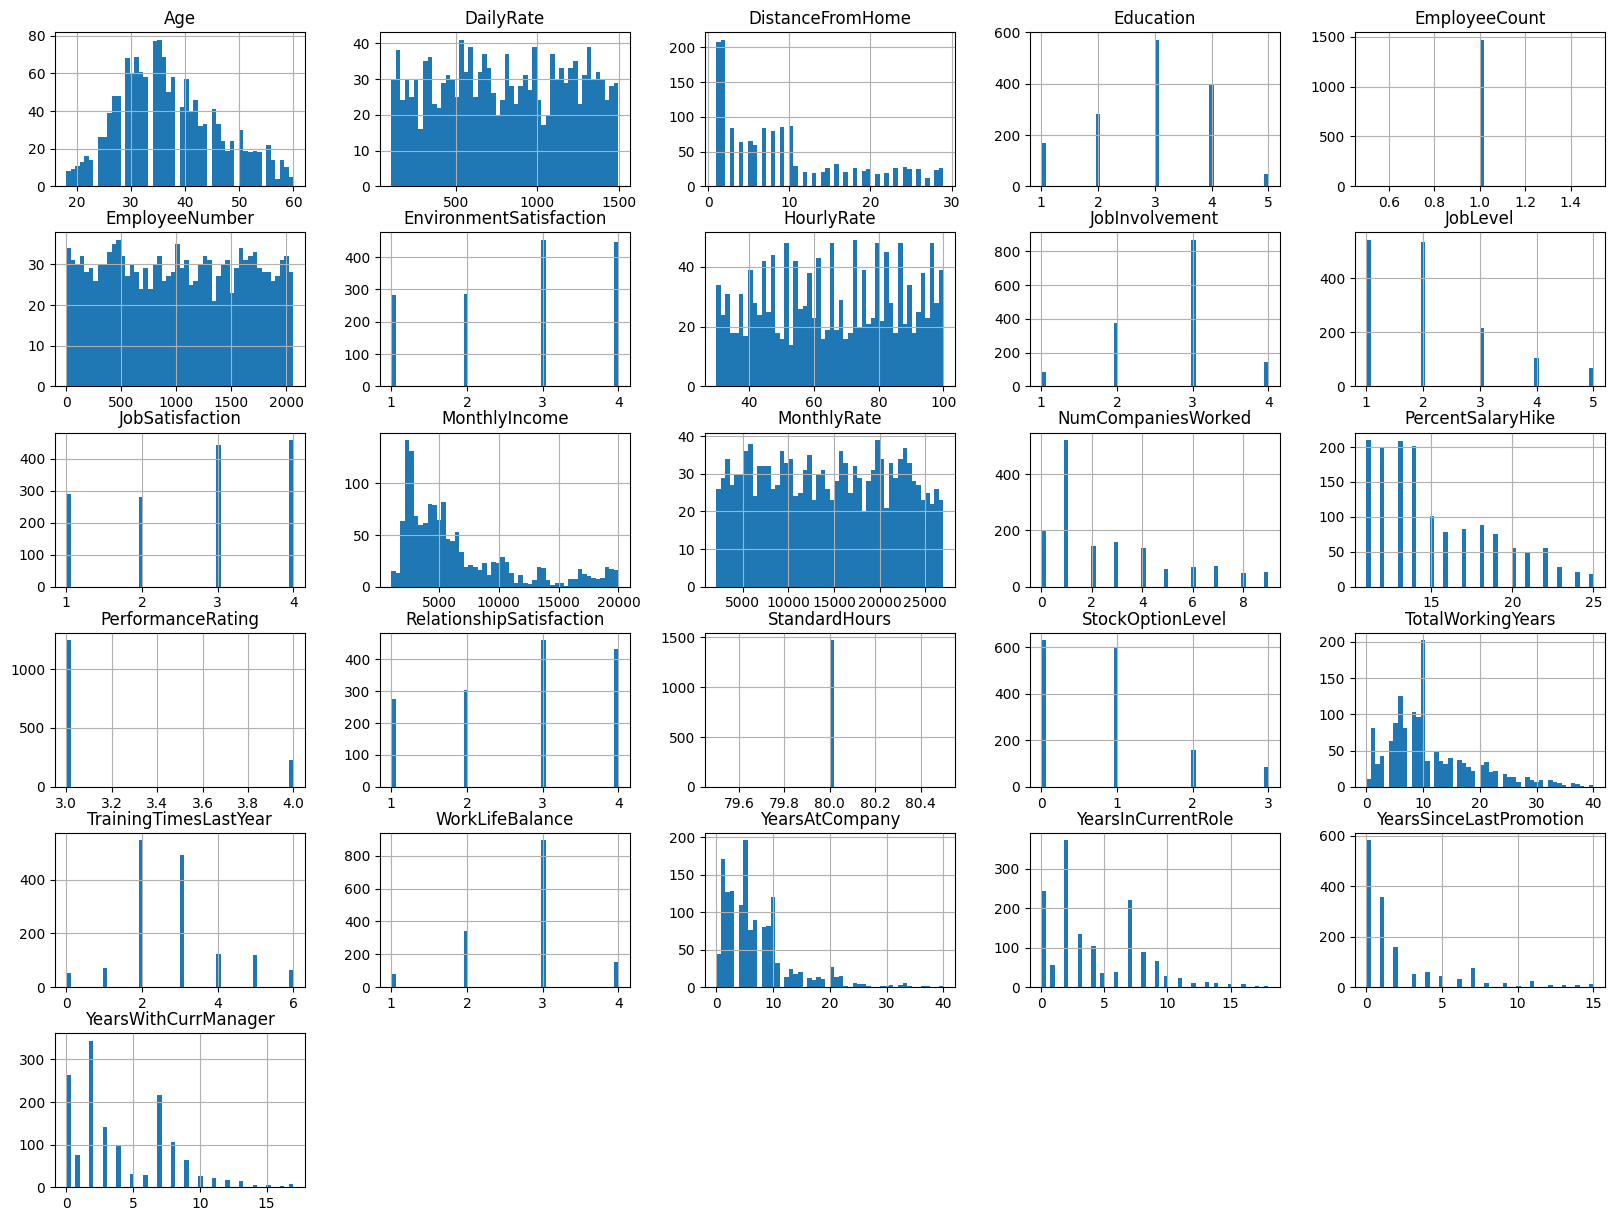

In [247]:
#To plot a histogram for each numerical attribute
employees.hist(bins=50, figsize=(20,15))
plt.show()


<u>Q4 List down the main observations you noted from the statistical summary and the histogram</u>

# Visualizing Geographical Data

<AxesSubplot: xlabel='JobLevel', ylabel='TotalWorkingYears'>

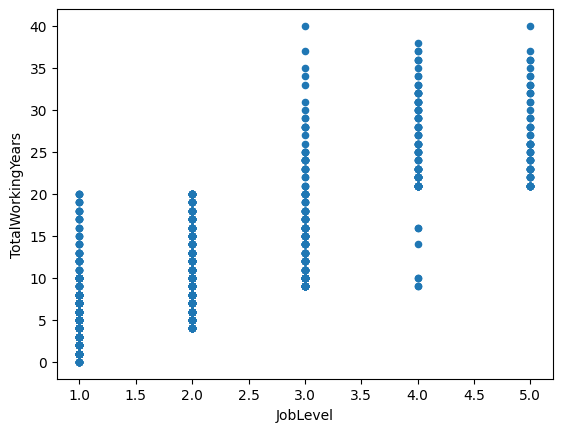

In [248]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
employees.plot(kind="scatter", x="JobLevel", y="TotalWorkingYears")


<AxesSubplot: xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

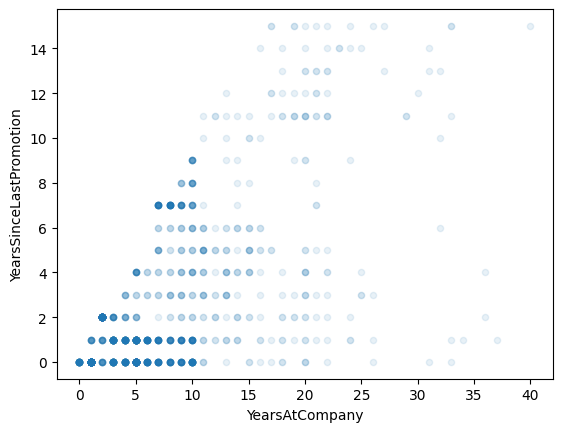

In [249]:
employees.plot(kind="scatter", x="YearsAtCompany", y="YearsSinceLastPromotion", alpha=0.1)

<AxesSubplot: xlabel='Age', ylabel='JobLevel'>

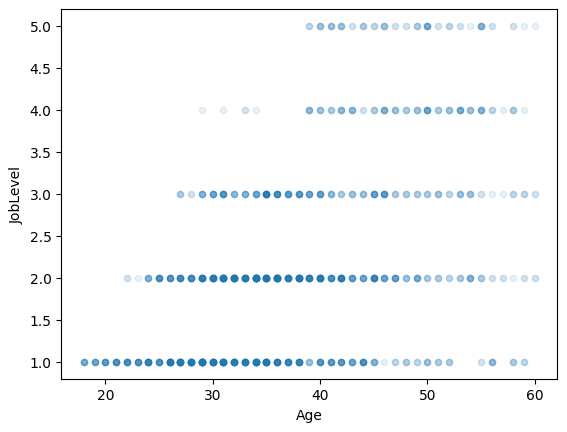

In [250]:
employees.plot(kind="scatter", x="Age", y="JobLevel", alpha=0.1)

In [251]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = employees.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

C:\Users\Mikyb\AppData\Local\Temp\ipykernel_9152\1598564889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = employees.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes


In [252]:
corr_matrix["Age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.Age)?
# Does that make sense? 

Age                         1.000000
TotalWorkingYears           0.680381
JobLevel                    0.509604
MonthlyIncome               0.497855
YearsAtCompany              0.311309
NumCompaniesWorked          0.299635
YearsSinceLastPromotion     0.216513
YearsInCurrentRole          0.212901
Education                   0.208034
YearsWithCurrManager        0.202089
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
JobInvolvement              0.029820
MonthlyRate                 0.028051
HourlyRate                  0.024287
DailyRate                   0.010661
EnvironmentSatisfaction     0.010146
PercentSalaryHike           0.003634
PerformanceRating           0.001904
DistanceFromHome           -0.001686
JobSatisfaction            -0.004892
EmployeeNumber             -0.010145
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
EmployeeCount                    NaN
StandardHours                    NaN
Name: Age, dtype: float64

<u>Q6 Which are the most correlated attributes with the output variable(i.e.Age)?</u>

The most correlated attributes in regards to age appear to be Total Working Years, Job Level and Monthly Income.


<u>Does that make sense?</u>

This outcome is exactly what is to be expected as an older employee will generally mean more years of expeerience therefore a higher positoon achieved resulting in a higher monthly salary

array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='Age'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='Age'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>],
       [<AxesSubplot: xlabel='Age', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='JobLevel'>],
       [<AxesSubplot: xlabel='Age', ylabel='MonthlyIncome'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='MonthlyIncome'>,
        <AxesSubplot

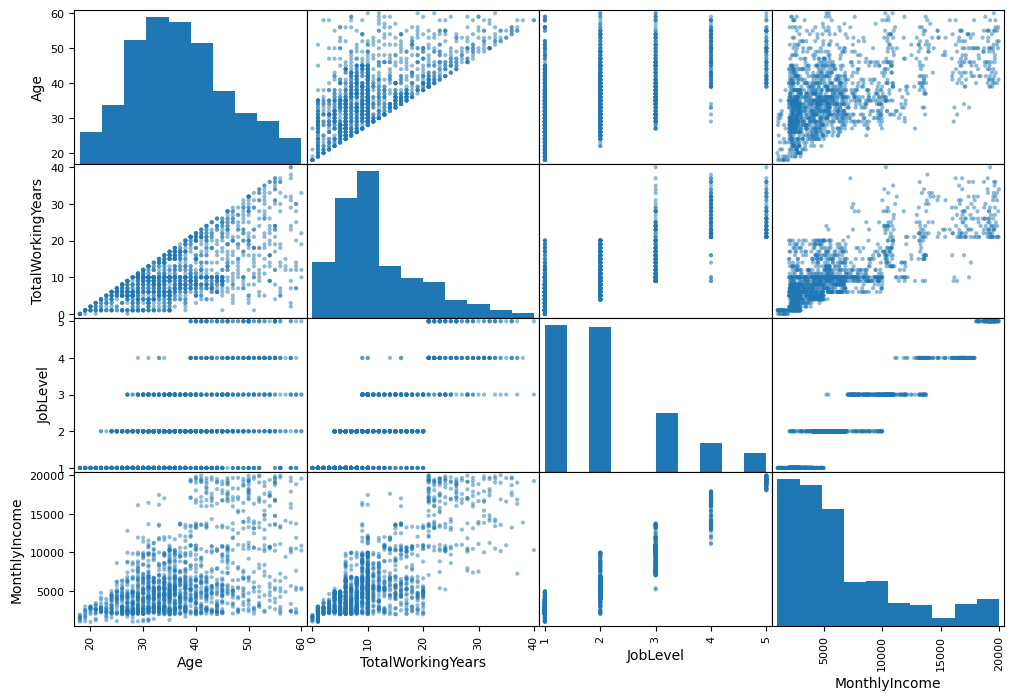

In [253]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "TotalWorkingYears", "JobLevel",
              "MonthlyIncome"]
scatter_matrix(employees[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(16.0, 65.0, 0.0, 20000.0)

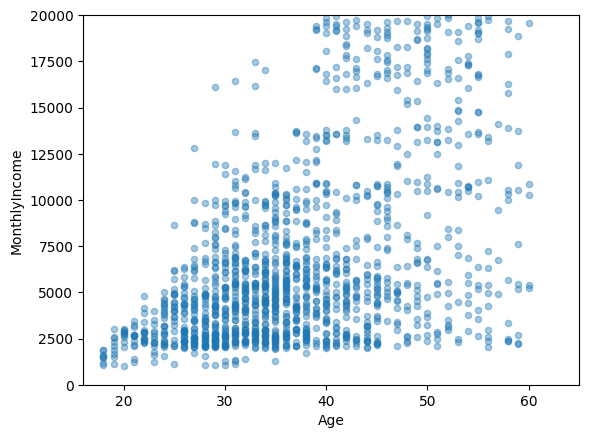

In [254]:
# let’s zoom in on the correlation scatterplot "monthly income & age,"
employees.plot(kind="scatter", x="Age", y="MonthlyIncome",
             alpha=0.4)
plt.axis([16, 65, 0, 20000])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

# Experimenting with Attribute Combinations

In [255]:
# Here you will generate new features. This is what we call feature engineering
# Q8 What are the new features that you are generating? Do they make sense ?

employees["rooms_per_household"] = employees["total_rooms"]/employees["households"]
employees["bedrooms_per_room"] = employees["total_bedrooms"]/employees["total_rooms"]
employees["population_per_household"]=employees["population"]/employees["households"]

KeyError: 'total_rooms'

In [ ]:
corr_matrix = employees.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

In [ ]:
#Q10 Plot the scatter plot of the rooms_per_household against median_house_value
#Q11 Now use the employees describe method to view the statistical summary of the dataset 

# Prepare the Data for Machine Learning Algorithms

In [ ]:
#employees_labels = employees["median_house_value"].copy()
#employees = employees.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new fearures  
employees = employees.drop("rooms_per_household", axis=1) 
employees = employees.drop("bedrooms_per_room", axis=1) 
employees = employees.drop("population_per_household", axis=1) 
employees.head()

## Data Cleaning
Dealing with missing features


1. Get rid of the corresponding districts. `dropna()`
2. Get rid of the whole attribute. `drop()` 
3. Set the values to some value (zero, the mean, the median, etc.)  `fillna()`


In [ ]:
sample_incomplete_rows = employees[employees.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values


In [ ]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  
#Q12 What is displayed below? Note your observation 

In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12


In [ ]:
median = employees["total_bedrooms"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13


In [ ]:
sample_incomplete_rows

## Scikit-Learn solution (optional)


In [ ]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [ ]:
#We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
employees_num = employees.drop("ocean_proximity", axis=1) 

In [ ]:
imputer.fit(employees_num)

The imputer has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. 

In [ ]:
imputer.statistics_

In [ ]:
employees_num.median().values #Check that this is the same as manually computing the median of each attribute


In [ ]:
X = imputer.transform(employees_num) # transform the data set

In [ ]:
employees_tr = pd.DataFrame(X, columns=employees_num.columns,
                          index=employees_num.index) # load the new tranformed data set into the pandas frame employees_tr

In [ ]:
employees_tr.loc[sample_incomplete_rows.index.values] # show the rows with previously missing values 

### Handling Text and Categorical Attributes

In [ ]:
employees_cat = employees[["ocean_proximity"]]
employees_cat.head(10)  # look at the value of  'ocean_proximity' for the first 10 instances 

In [ ]:
employees_cat.tail(10)
# look at the value of  'ocean_proximity' for the last 10 instances

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# sklearn OrdinalEncoder class is used to convert categorical values to numbers
ordinal_encoder = OrdinalEncoder() 
employees_cat_encoded = ordinal_encoder.fit_transform(employees_cat)
employees_cat_encoded[:10] # Lists the numerical values that correspond to the categorical attribute
# Q15 Why can representing a catogorical variable with numbers be a problem in ML?


In [ ]:
# 1 D array of categories for the attribute 'ocean-proximity'
ordinal_encoder.categories_ # prints the categories for all categorical attributes , here we only have one categorical attribute


In [ ]:
# An alternative way to represent a categorical attribuite is to use 'one-hot-encoding'

from sklearn.preprocessing import OneHotEncoder  
# OneHotEncoder class converts categorical values into one-hot vectors , this assumes no order so better for categorical variables

cat_encoder = OneHotEncoder()
employees_cat_1hot = cat_encoder.fit_transform(employees_cat)
employees_cat_1hot

In [ ]:
type(employees_cat_1hot) # This is a SciPy sparce matrix ( not a NumPy array)
# a sparse matrix only stores the location of the non‐zero enties , therefore saves memory

In [ ]:
employees_cat_1hot.toarray() # To convert it to a (dense) NumPy array, call toarrray() method

In [ ]:
cat_encoder = OneHotEncoder(sparse=False) # Alternatively, you can set sparse=False when creating the OneHotEncoder
employees_cat_1hot = cat_encoder.fit_transform(employees_cat)
employees_cat_1hot

In [ ]:
cat_encoder.categories_         # Get a list of categories

### Feature Scaling (optional)




In week 2 lectures you have learned about two common ways to get all attributes to have the same scale: min-max scaling and standardization (Zscore).

Sklearn provides two transformer functions for this 

In [ ]:
#Q16 Research sklearn documentation for the functions MinMaxScaler() and StandardScaler() and try to experiment with it on the employees data set